In [93]:
# Codice per clonare la repository di github con tutti i dati. Va eseguito una sola volta
# (per questo si controlla se la cartella esista già o meno)
# È stato scelto questo metodo per permettere a tutti, sia da google colab che in locale,
# di avere i dati a disposizione

# Se si esegue in locale, assicurarsi di avere git installato
# Al link della repository sono visionabili tutti i file
from os import path
if not path.exists("Laboratorio_Fisica_3"):
    !git clone https://github.com/MasterRoby3/Laboratorio_Fisica_3

# Per comodità si definisce una variabile che sia la radice di tutti i percorsi utilizzati, in modo da alleggerire il codice successivo
rad = "Laboratorio_Fisica_3/Attività_ottica/"

# In questa prima cella si importano anche le librerie necessarie:
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt
import pandas as pd

#Altri dati utili per i plot
titlefontsize, labelfontsize, tickfontsize=20, 16, 14
markersize, linewidth = 6, 1

# Attività ottica

L'obiettivo di questa esperienza è studiare l'attività ottica di varie soluzioni con luce di diversa lunghezza d'onda. L'apparato sperimentale è comprensivo di:
* Polarimetro con 4 LED: rosso (630 nm), giallo (580 nm), verde (525 nm), blu (468 nm)
* Cilindro graduato per polarimetro
* Vetreria e materiali di consumo
* Saccarosio, fruttosio e glucosio
* Soluzione HCl al 25% (utilizzata per la parte 4 dell'esperienza)

## Parte 1: verifica della legge dell'attività ottica
In questa parte dell'esperienza si vuole verificare la legge di Biot:
$$\alpha = k \cdot c \cdot L$$
dove $\alpha$ è l'angolo, $k$ il *potere rotatorio specifico*, $c$ la concentrazione e $L$ la lunghezza della soluzione.

Per prima cosa si effettua una misura di $\alpha$ in funzione di $L$, mostrando che sono proporzionali. La soluzione utilizzata ha una quantità di saccarosio fissa di 40 grammi in 80 cl di acqua (la soluzione è stata versata piano piano nel cilindro graduato per ottenere le varie lunghezze a concentrazione costante).

NOTA: in questa parte dell'esperienza si è operato con il LED verde, cioè a 525 nm.

In [6]:
# Qui si definiscono le funzioni utili per il fit
def linear(x, m):
    return m * x

# Funzione utile per il calcolo dell'R^2
def r_squared(actual, predicted):
    residuals = actual - predicted
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum( (actual - np.mean(actual))**2 )
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

Valore fittato per il coefficiente di proporzionalità= 3.19 deg/cm deviazione standard= 0.0897 deg/cm
R^2 =  0.99627


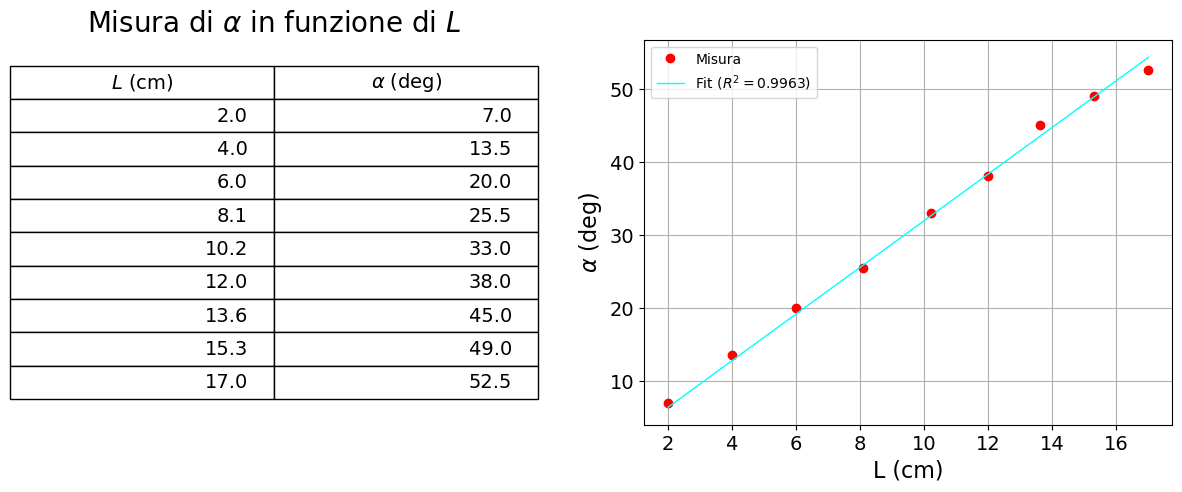

In [11]:
# Lettura dati da csv
data = pd.read_csv(rad + "data/parte1-alfa_funz_L.csv")
headers = data.keys()

L = data["L"].to_numpy();
alfa = data["alfa"].to_numpy();

# Tabella
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
ax1.set_title(r"Misura di $\alpha$ in funzione di $L$", size=titlefontsize)
ax1.axis('tight')
ax1.axis('off')
columns = [r"$L$ (cm)", r"$\alpha$ (deg)"]
table = ax1.table(cellText=data.values, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

ndata = len(L)

# Si effettua ora il fit lineare per il coefficiente di proporzionalità
popt, pcov = sop.curve_fit(linear, L, alfa)
coeff = popt[0]
# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(alfa, linear(L, coeff))

print('Valore fittato per il coefficiente di proporzionalità=', "{:.3g}".format(coeff), 'deg/cm deviazione standard=',"{:.3g}".format(sigma[0]), 'deg/cm')
print("R^2 = ", "{:.5g}".format(r_sq))

ax2.set_title('', size=titlefontsize)
ax2.plot(L, alfa, 'o', markersize=markersize, linewidth=linewidth, color='red', label="Misura")
ax2.plot(L, linear(L, coeff), linewidth=linewidth, color='cyan', label="Fit ($R^2=${:.4f})".format(r_sq))
ax2.set_xlabel('L (cm)', size=labelfontsize)
ax2.set_ylabel(r'$\alpha$ (deg)', size=labelfontsize)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend();

Si è proceduto poi a effettuare delle misure in funzione della concentrazione. Per non preparare molte soluzioni diverse, si è osservato che il volume della soluzione è dato da $V = S \cdot L$, con $S$ la sezione del cilindro graduato (determinata una volta per tutte); essendo quindi che $c = P/V$, dove $P$ è il peso, si riscrive la legge di Biot come:
$$\alpha = k \cdot \frac{P}{S}$$
Conoscendo la sezione, quindi, si può fittare il parametro dovuto al potere rotatorio specifico.

La sezione può essere facilmente calcolata misurando l'altezza del cilindro graduato a 100 ml e dividendo il volume per quest'altezza. Si ottiene:
$$S = \frac{V}{h} = \frac{100}{16.8} \approx 5.95 \ cm^2$$
(la sezione verrà calcolata con precisione e salvata in una variabile nella prossima cella di codice)

Si riportano di seguito i dati raccolti e il valore stimato per $k$.

Valore fittato per k= 8.55 deg*cm^2/g deviazione standard= 0.151 deg*cm^2/g
R^2 =  0.99854


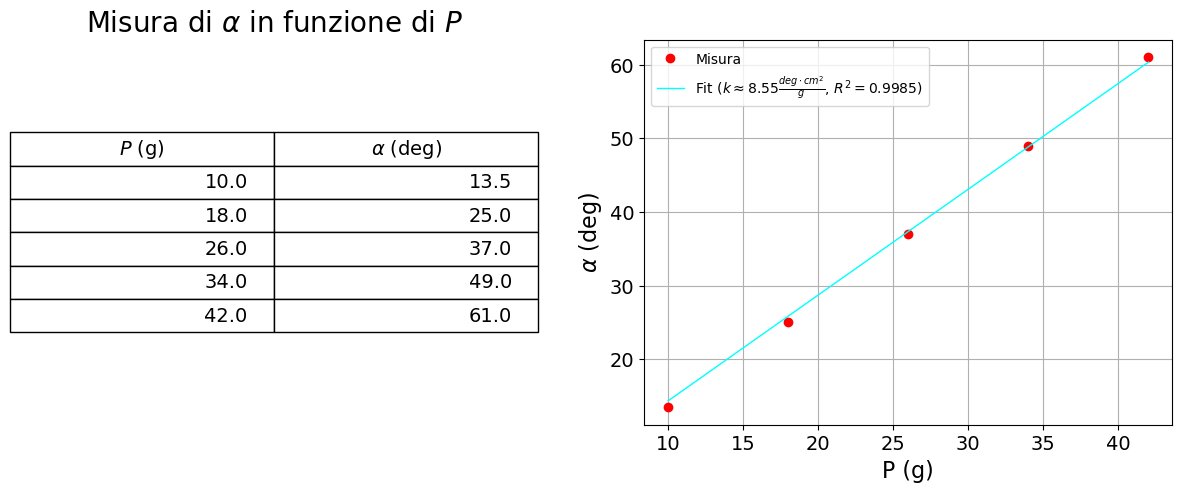

In [31]:
# Calcolo sezione
S = 100./16.8

# Lettura dati da csv
data = pd.read_csv(rad + "data/parte1-alfa_funz_P.csv")
headers = data.keys()

P = data["P"].to_numpy();
alfa = data["alfa"].to_numpy();

# Tabella
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
ax1.set_title(r"Misura di $\alpha$ in funzione di $P$", size=titlefontsize)
ax1.axis('tight')
ax1.axis('off')
columns = [r"$P$ (g)", r"$\alpha$ (deg)"]
table = ax1.table(cellText=data.values, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

ndata = len(P)

# Si effettua ora il fit non lineare per i parametri x_0 e A
popt, pcov = sop.curve_fit(linear, P/S, alfa)
k = popt[0]
# Si calcola la deviazione standard
sigma = np.sqrt(ndata*np.diag(pcov))
r_sq = r_squared(alfa, linear(P/S, k))

print('Valore fittato per k=', "{:.3g}".format(k), 'deg*cm^2/g deviazione standard=',"{:.3g}".format(sigma[0]), 'deg*cm^2/g')
print("R^2 = ", "{:.5g}".format(r_sq))

ax2.set_title('', size=titlefontsize)
ax2.plot(P, alfa, 'o', markersize=markersize, linewidth=linewidth, color='red', label="Misura")
ax2.plot(P, linear(P, k/S), linewidth=linewidth, color='cyan', label=r"Fit ($k\approx${:.3g}".format(k) + r"$\frac{deg \cdot cm^2}{g}$" + ", $R^2=${:.4f})".format(r_sq))
ax2.set_xlabel('P (g)', size=labelfontsize)
ax2.set_ylabel(r'$\alpha$ (deg)', size=labelfontsize)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend();

##Parte 2: potere rotatorio specifico di saccarosio, fruttosio, glucosio
In questa parte dell'esperienza si vogliono effettuare misure dell'angolo a diverse lunghezze d'onda per stimare il potere rotatorio specifico a 589 nm, di cui si conosce il valore di riferimento:
* Saccarosio: $k=6.65 \frac{deg \cdot cm^2}{g}$
* D-Glucosio: $k=5.24 \frac{deg \cdot cm^2}{g}$
* Fruttosio: $k=-9.12\frac{deg \cdot cm^2}{g}$

La procedura consiste nell'ottenere prima $A$ fittando la relazione $k(\lambda) = \frac{A}{\lambda^2}$ sulla base dei dati raccolti (si ricava $k$ alle varie lunghezze d'onda partendo dalle misure degli angoli, utilizzando la relazione $k = \frac{\alpha \cdot S}{P}$) e poi utilizzandolo per ricavare $k$ alla lunghezza d'onda desiderata.

Oltre la sezione, definita nella parte precedente, in questa sezione viene mantenuto fisso anche il peso $P = 15\ g$.

Di seguito vengono riportati i dati acquisiti e la relativa analisi.

In [38]:
def pot_rot(l_onda, A):
    return A / (l_onda**2)

Valore fittato nel Saccarosio per A= 2.31e+06 deg*cm^2*nm^2/g deviazione standard= 6.49e+04 deg*cm^2*nm^2/g
R^2 =  0.98639
Valore fittato nel Fruttosio per A= -3.14e+06 deg*cm^2*nm^2/g deviazione standard= 8.11e+04 deg*cm^2*nm^2/g
R^2 =  0.99072
Valore fittato nel Glucosio per A= 1.83e+06 deg*cm^2*nm^2/g deviazione standard= 2.37e+04 deg*cm^2*nm^2/g
R^2 =  0.99747


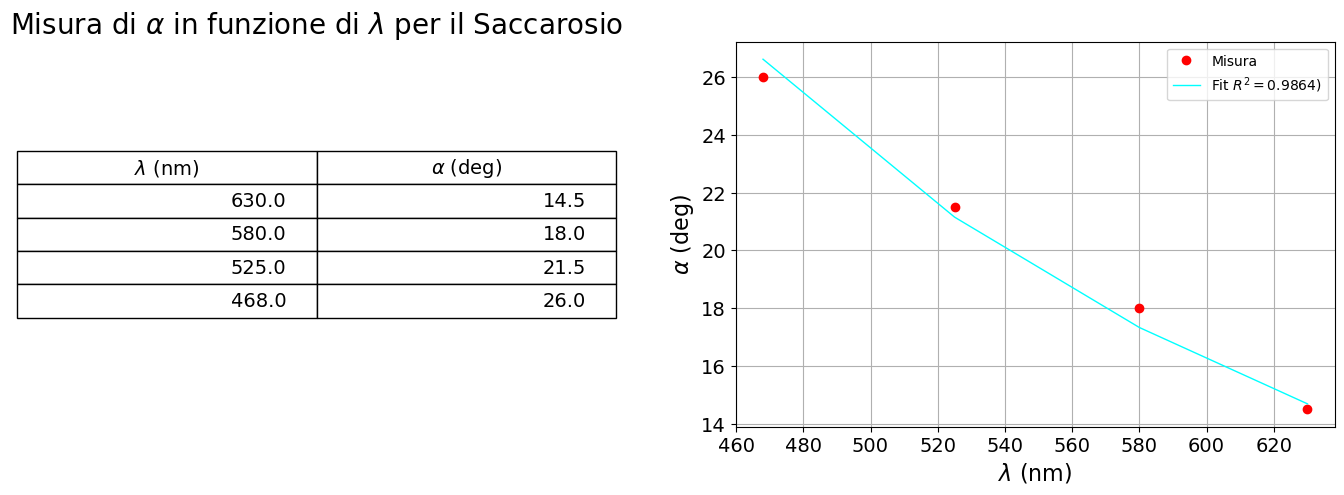

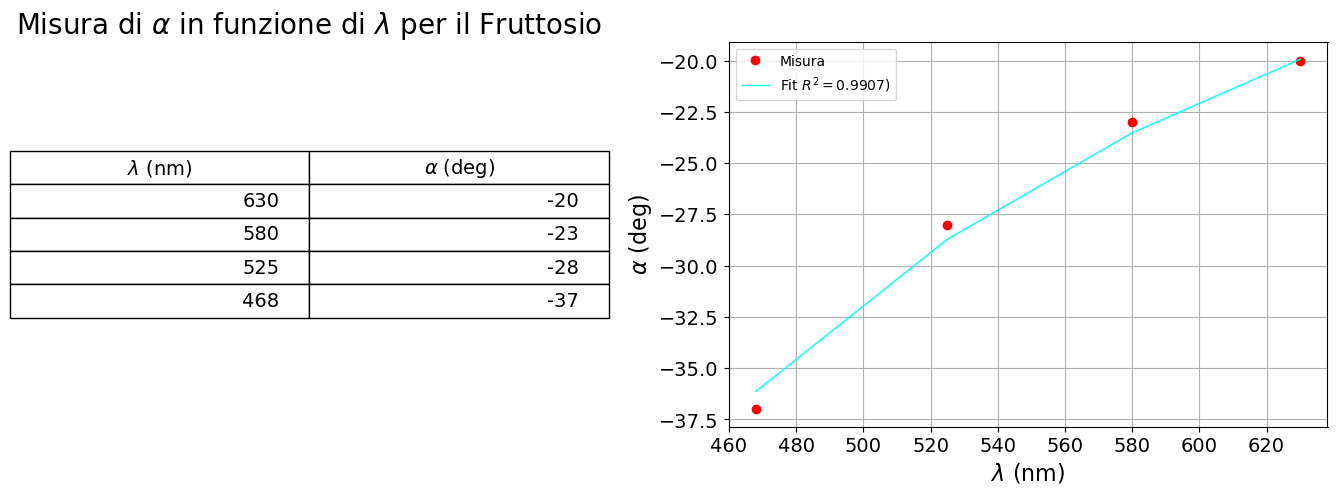

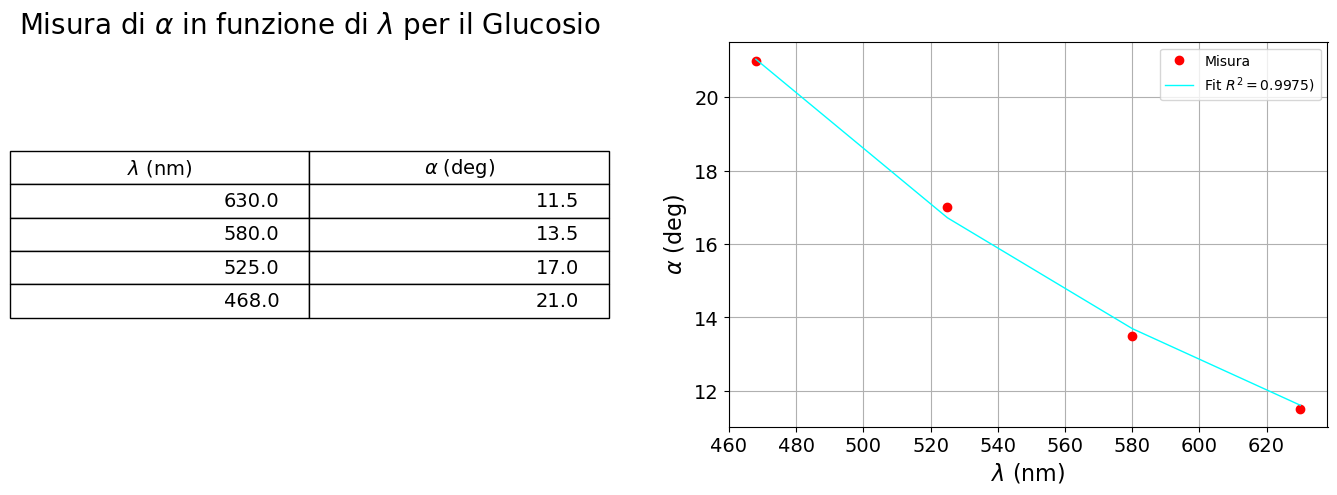

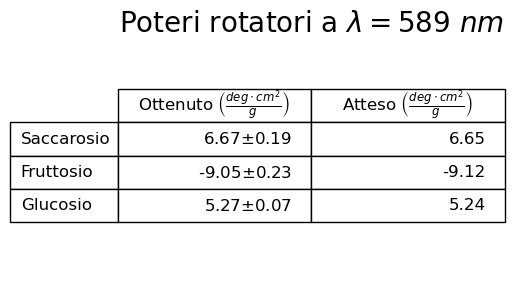

In [50]:
# Fisso il peso
P = 15

# Lettura dati da csv
data = pd.read_csv(rad + "data/parte2-pot_rot_sp.csv")
headers = data.keys()

lungh_onda = data["lambda"].to_numpy();
# Si salvano i dati sull'angolo in un dizionario in modo da poter produrre tabelle e grafici iterativamente
alfa_dict = {
    "Saccarosio":data["alfa_saccarosio"].to_numpy(),
    "Fruttosio":data["alfa_fruttosio"].to_numpy(),
    "Glucosio":data["alfa_glucosio"].to_numpy()
}

# Dizionario per salvare i risultati del fit, ovvero il parametro A e la deviazione standard
fit_res = {
    "Saccarosio":[0,0],
    "Fruttosio":[0,0],
    "Glucosio":[0,0]
}

for soluzione, alfa in alfa_dict.items():
    # Tabella
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[17,5])
    ax1.set_title(r"Misura di $\alpha$ in funzione di $\lambda$ per il "+soluzione, size=titlefontsize)
    ax1.axis('tight')
    ax1.axis('off')
    columns = [r"$\lambda$ (nm)", r"$\alpha$ (deg)"]
    table_content = pd.DataFrame([lungh_onda, alfa_dict[soluzione]]).T
    table = ax1.table(cellText=table_content.values, colLabels=columns, loc='center')
    table.set_fontsize(14)
    table.scale(1, 2)

    k = alfa * S / P

    ndata = len(lungh_onda)

    # Si effettua ora il fit non lineare per i parametri x_0 e A
    popt, pcov = sop.curve_fit(pot_rot, lungh_onda, k)
    A = popt[0]
    # Si calcola la deviazione standard
    sigma = np.sqrt(ndata*np.diag(pcov))
    r_sq = r_squared(k, pot_rot(lungh_onda, A))

    fit_res[soluzione] = [A, sigma[0]]

    print('Valore fittato nel', soluzione ,'per A=', "{:.3g}".format(A), 'deg*cm^2*nm^2/g deviazione standard=',"{:.3g}".format(sigma[0]), 'deg*cm^2*nm^2/g')
    print("R^2 = ", "{:.5g}".format(r_sq))

    ax2.set_title('', size=titlefontsize)
    ax2.plot(lungh_onda, alfa, 'o', markersize=markersize, linewidth=linewidth, color='red', label="Misura")
    ax2.plot(lungh_onda, pot_rot(lungh_onda, A)*P/S, linewidth=linewidth, color='cyan', label=r"Fit $R^2=${:.4f})".format(r_sq))
    ax2.set_xlabel('$\lambda$ (nm)', size=labelfontsize)
    ax2.set_ylabel(r'$\alpha$ (deg)', size=labelfontsize)
    ax2.tick_params(labelsize=tickfontsize)
    ax2.grid(True)
    ax2.legend();

# Per finire si stampa la tabella con i valori stimati di k a 589 nm
# Tabella
fig, ax = plt.subplots(1, 1, figsize=[5,3])
ax.set_title(r"Poteri rotatori a $\lambda=589\ nm$", size=titlefontsize)
ax.axis('tight')
ax.axis('off')
columns = [r"Ottenuto $\left(\frac{deg \cdot cm^2}{g}\right)$", r"Atteso $\left(\frac{deg \cdot cm^2}{g}\right)$"]
rows = list(fit_res.keys())
lambda_ref = 589
table_content = [
    ["{:.2f}".format(fit_res["Saccarosio"][0]/(lambda_ref**2))+"$\pm$"+"{:.2f}".format(fit_res["Saccarosio"][1]/(lambda_ref**2)), "6.65"],
    ["{:.2f}".format(fit_res["Fruttosio"][0]/(lambda_ref**2))+"$\pm$"+"{:.2f}".format(fit_res["Fruttosio"][1]/(lambda_ref**2)), "-9.12"],
    ["{:.2f}".format(fit_res["Glucosio"][0]/(lambda_ref**2))+"$\pm$"+"{:.2f}".format(fit_res["Glucosio"][1]/(lambda_ref**2)), "5.24"]
]
table = ax.table(cellText=table_content, rowLabels=rows, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

Nell'ultima tabella si può vedere come ci sia ottimo accordo tra i valori ottenuti e quelli attesi.

## Parte 3: mutarotazione del glucosio
In questa fase dell'espperimento si vuole osservare il fenomeno della mutarotazione, ovvero il processo secondo cui le due forme di $\alpha$-D-glucosio e $\beta$-D-glucosio si trasformano l'una nell'altra sino a raggiungere l'equilibrio 36%$\alpha$ - 64%$\beta$. Registrando i valori dell'angolo in funzione del tempo, si dovrebbe essere in grado di risalire a quale dei due isomeri sia stato utilizzato per produrre la soluzione di partenza.
Il peso del glucosio utilizzato è fissato $P=15\ g$, così come la lunghezza d'onda $\lambda = 525\ nm$ (LED verde) e la sezione S. In questo modo, si può ricavare il potere rotatorio in funzione del tempo dalla relazione $k = \frac{\alpha \cdot S}{P}$.
NOTA: dato che il potere rotatorio varia tanto più velocemente quanto è maggiore la temperatura dell'acqua, per questo esperimento si utilizza acqua calda.

Di seguito i dati registrati.

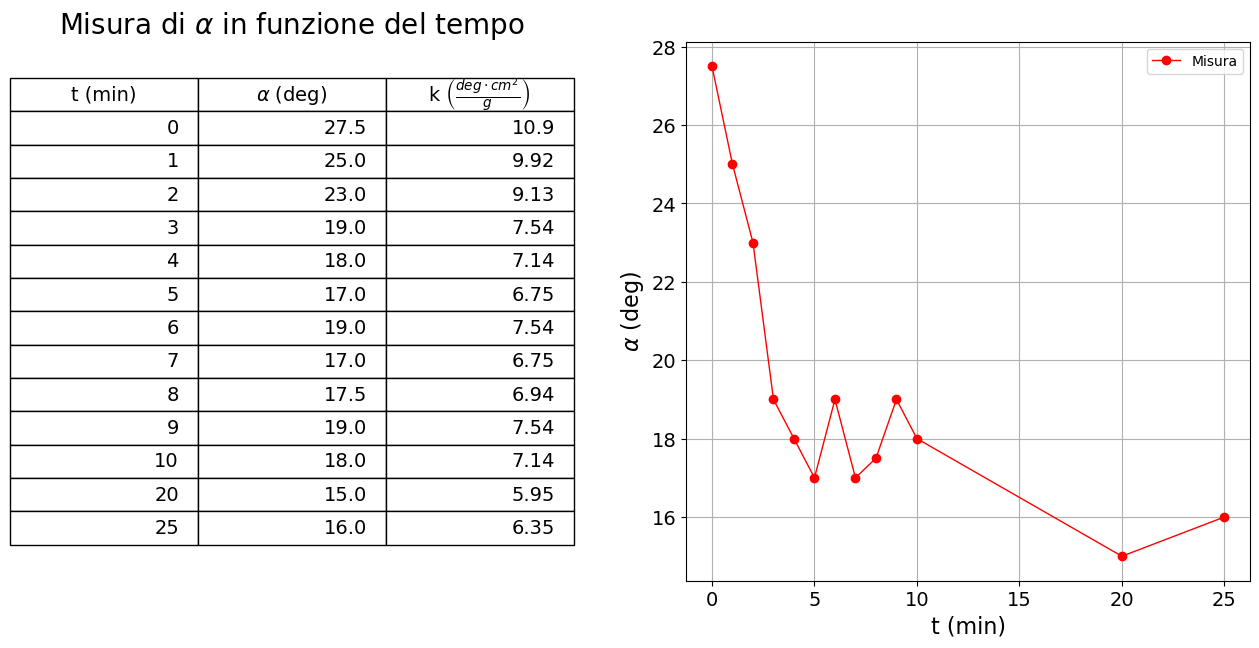

In [90]:
# Peso del glucosio utilizzato in grammi
P = 15

# Lettura dati da csv
data = pd.read_csv(rad + "data/parte3-mutarotazione.csv")
headers = data.keys()

t = data["t"].to_numpy();
alfa = data["alfa"].to_numpy();
k = alfa * S / P

# Tabella
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,7])
ax1.set_title(r"Misura di $\alpha$ in funzione del tempo", size=titlefontsize)
ax1.axis('tight')
ax1.axis('off')
cols = ["t (min)", r"$\alpha$ (deg)", r"k $\left(\frac{deg \cdot cm^2}{g}\right)$"]
table_data = [t, alfa, ["{:.3g}".format(k_str) for k_str in k]]
df = pd.DataFrame(table_data).T
table = ax1.table(cellText=df.values, colLabels=cols, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

ax2.set_title('', size=titlefontsize)
ax2.plot(t, alfa, 'o-', markersize=markersize, linewidth=linewidth, color='red', label="Misura")
ax2.set_xlabel('t (min)', size=labelfontsize)
ax2.set_ylabel(r'$\alpha$ (deg)', size=labelfontsize)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend();

Come si vede chiaramente dai valori di $k$ in tabella, l'isomero di partenza è l'$\alpha$-D-glucosio con un potere rotatorio a 589 nm $k = 11.2\ \frac{deg \cdot cm^2}{g}$. Si vede chiaramente dal grafico che la reazione è molto veloce nei primi minuti, tendendo poi a rallentare fino a far oscillare il valore dell'angolo tra valori simili al passare del tempo (il fatto che il valore dell'angolo non sia perfettamente stabile è dato proprio dal fatto che i due isomeri del glucosio continuano a trasformarsi l'uno nell'altro, raggiungendo una sorta di equilibrio).

## Parte 4: inversione della soluzione di saccarosio
In questa ultima parte dell'esperienza si vuole verificare l'inversione del potere rotatorio di una soluzione di saccarosio con aggiunta di acido cloridrico. Questo fenomeno è dovuto al fatto che, in acqua, il saccarosio si scinde naturalmente in glucosio e fruttosio per idrolisi; questa reazione avviene spontaneamente ad alta temperatura ma è molto lenta: essa viene notevolmente accelerata dall'aggiunta di HCl che funge da catalizzatore. A reazione terminata si dovrebbe ottenere una soluzione con potere rotatorio invertito, dato che, essendo $k = \frac{1}{2}[k(\text{fruttosio}) + k(\text{glucosio})]$, il $k$ del fruttosio è negativo e maggiore in valore assoluto rispetto a quello del glucosio, quindi prevale, portando il $k$ complessivo a d essere negativo.

Per effettuare questa parte di esperienza, si sciolgono $P = 30\ g$ di saccarosio in acqua molto calda, aggiungendo poi qualche ml di HCl al 25%. Si sono poi effettuate alcune misure a grandi intervalli di tempo per vedere l'effetto d'inversione (per essere sicuri di non effettuare errori, si sono presi i dati dell'angolo agli stessi intervalli di tempo su una parte della soluzione di saccarosio senza HCl e si è verificato che l'angolo rimaneva stabile). Similmente alla parte 3, si è mantenuta fissa $\lambda = 525\ nm$.

Di seguito i dati registrati.

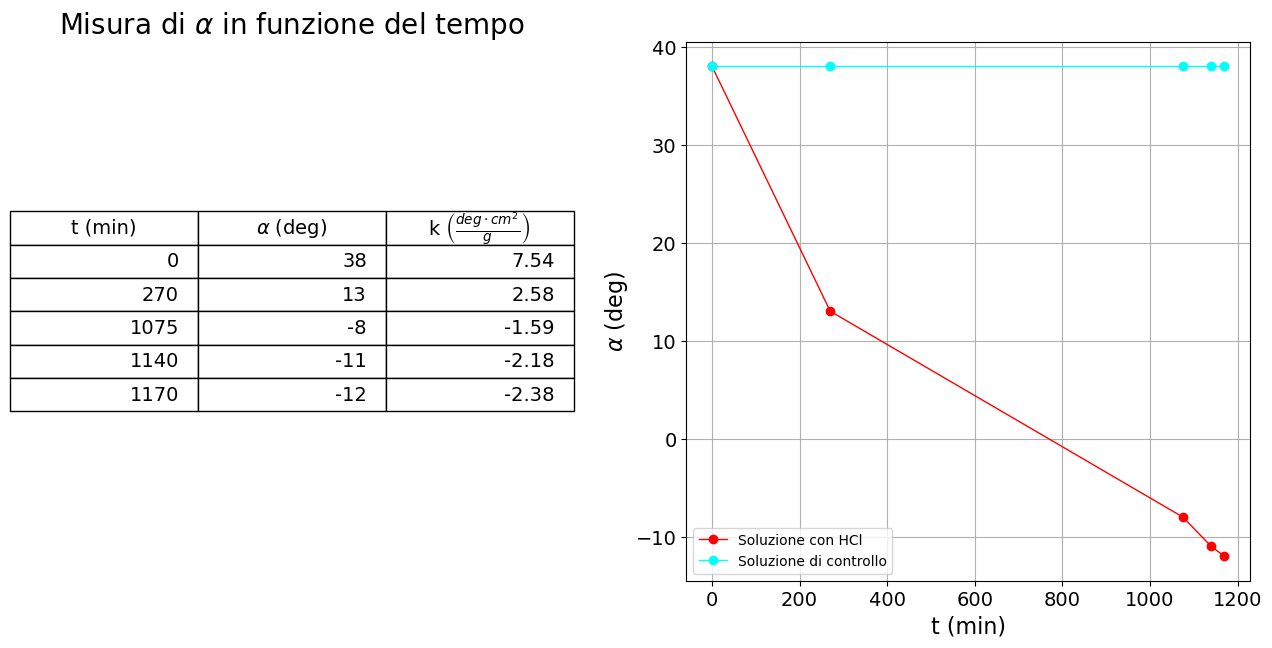

In [92]:
# Peso del glucosio utilizzato in grammi
P = 30

# Lettura dati da csv
data = pd.read_csv(rad + "data/parte4-inversione.csv")
headers = data.keys()

t = data["t"].to_numpy()
alfa = data["alfa"].to_numpy()
alfa_controllo = data["alfa_controllo"].to_numpy()
k = alfa * S / P

# Tabella
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,7])
ax1.set_title(r"Misura di $\alpha$ in funzione del tempo", size=titlefontsize)
ax1.axis('tight')
ax1.axis('off')
cols = ["t (min)", r"$\alpha$ (deg)", r"k $\left(\frac{deg \cdot cm^2}{g}\right)$"]
table_data = [t, alfa, ["{:.3g}".format(k_str) for k_str in k]]
df = pd.DataFrame(table_data).T
table = ax1.table(cellText=df.values, colLabels=cols, loc='center')
table.set_fontsize(14)
table.scale(1, 2)

ax2.set_title('', size=titlefontsize)
ax2.plot(t, alfa, 'o-', markersize=markersize, linewidth=linewidth, color='red', label="Soluzione con HCl")
ax2.plot(t, alfa_controllo, 'o-', markersize=markersize, linewidth=linewidth, color='cyan', label="Soluzione di controllo")
ax2.set_xlabel('t (min)', size=labelfontsize)
ax2.set_ylabel(r'$\alpha$ (deg)', size=labelfontsize)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)
ax2.legend();

Non essendo stati fisicamente in laboratorio si hanno pochi dati a disposizione, quindi si può concludere poco sulla velocità di reazione. L'inversione del potere rotatorio, però, è evidente. Si è plottata anche la soluzione di saccarosio di controllo per enfatizzare l'effetto dell'HCl.